In [1]:
import sys

import matplotlib.pyplot as plt

sys.path.append('..')
from antlia import lidar
from antlia.dtype import load_converted_record

%load_ext autoreload
%autoreload 2

In [2]:
filename = '../test.pkl.gz'
#filename = '/Users/oliver/Desktop/2018-04-20-16-36-10_0.pkl.gz'
try:
    data = load_converted_record(filename)
except FileNotFoundError:
    import rosbag
    import printbag
    
    with rosbag.Bag(filename) as bag:
        data = printbag.convert_bag(bag)
finally:
    record = lidar.LidarRecord(data)

<IPython.core.display.Javascript object>


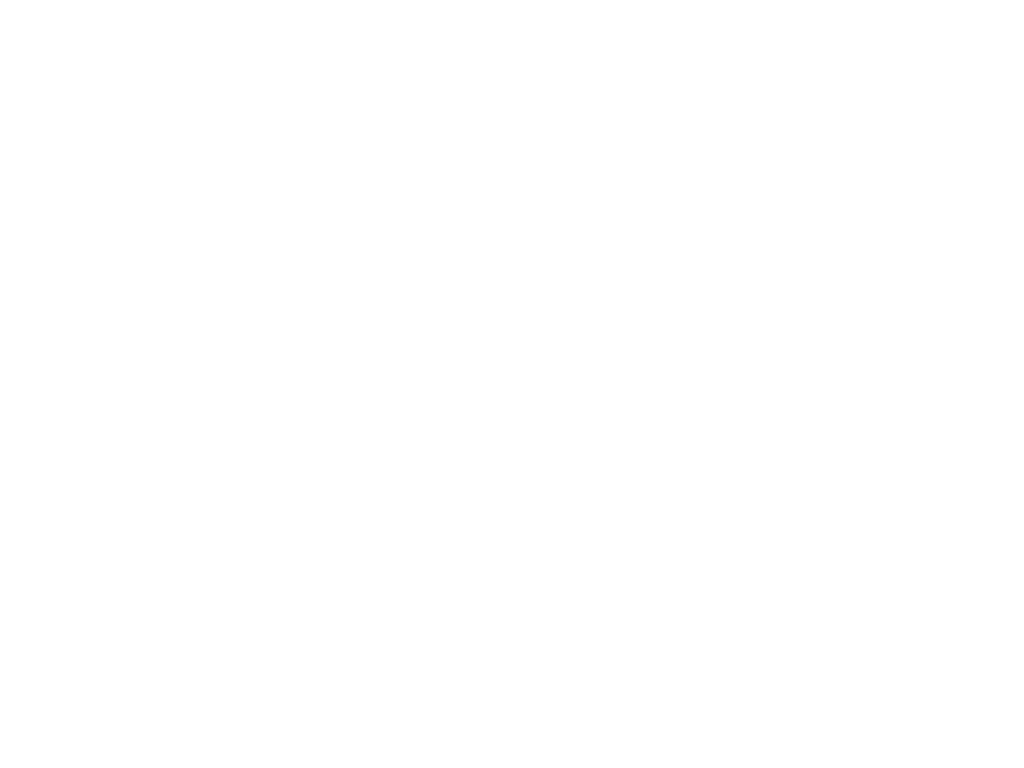

In [21]:
import IPython.display

def display_animation(anim):
    plt.close(anim._fig)
    IPython.display.display(IPython.display.HTML(anim.to_html5_video()))
    
#t0 = 280 # seconds
#tf = 290 # seconds
#freq = 20 # Hz
r = 100
display_animation(record[:100].animate(xlim=(-r, r), ylim=(0, r), rlim=(0, r), speedup=2))

<IPython.core.display.Javascript object>


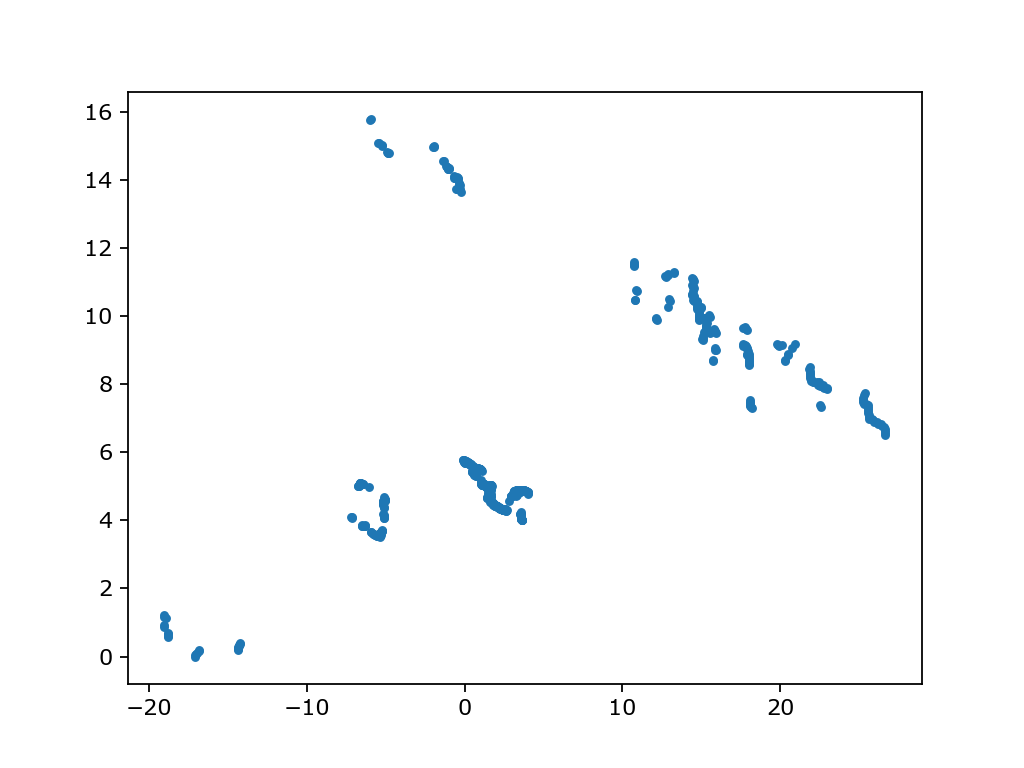

In [4]:
%matplotlib notebook
plt.close('all')

xy_lim = ((-60, 60), (0, 60))
n = 12
x, y = map(lambda x: x.compressed(), record[n:n + 1].cartesian(*xy_lim))

fig, ax = plt.subplots()
ax.scatter(x, y, marker='.')

plt.show()

<IPython.core.display.Javascript object>


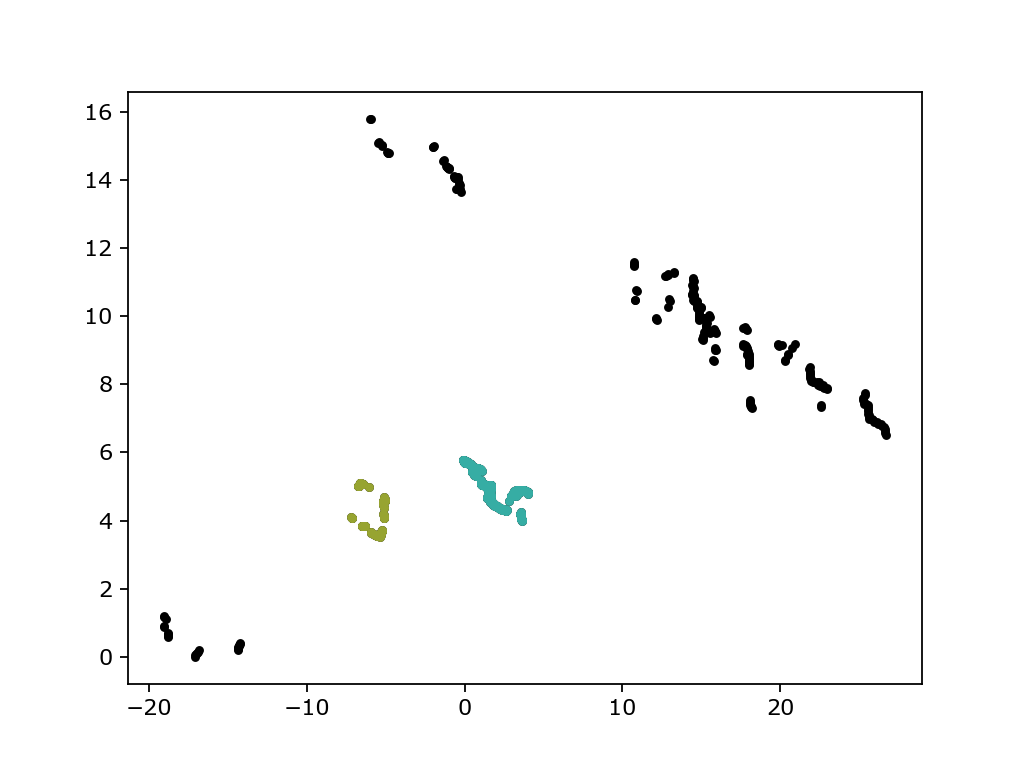

In [5]:
from hdbscan import HDBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import numpy as np
import scipy.spatial
import seaborn as sns

xy_lim = ((-60, 60), (0, 60))
n = 12
x, y = map(lambda x: x.compressed(), record[n:n + 1].cartesian(*xy_lim))
X = np.vstack((x, y)).transpose()

hdb = HDBSCAN(min_cluster_size=40, metric='euclidean').fit(X)
hdb_labels = hdb.labels_
hdb_unique_labels = set(hdb_labels)

colors = sns.husl_palette(len(hdb_unique_labels))
fig, ax = plt.subplots()
ax.plot(x, y, '.', color='black', zorder=0)
for i in range(len(hdb_unique_labels)):
    index = hdb_labels == i
    
    if np.count_nonzero(index):
        hull = scipy.spatial.ConvexHull(X[index])
        if hull.area < 10:
            ax.scatter(x[index], y[index], color=colors[i], marker='.', zorder=1)
    
plt.show()